In [13]:
import tarfile
import os
from astropy.io import fits
import pandas as pd
import numpy as np

In [ ]:
#This part only needs to be done once to extract the files from the tar.xz file
# Step 1: Extract the tar.xz file
file_path = '/Users/aryanahaghjoo/Documents/GitHub/super_resolution/data/JADES/hlsp_jades_jwst_nirspec_f290lp-g395m.tar.xz'
extract_dir = 'jades_spectra'

# Extract the files
with tarfile.open(file_path, 'r:xz') as tar:
    tar.extractall(extract_dir)

# Step 2: Locate and read FITS files
fits_files = [os.path.join(root, file) 
              for root, dirs, files in os.walk(extract_dir) 
              for file in files if file.endswith('.fits')]

In [14]:
# Step 2: Locate and read FITS files
fits_files = [os.path.join(root, file) 
              for root, dirs, files in os.walk(extract_dir) 
              for file in files if file.endswith('.fits')]

In [15]:
# Step 3: Read data into DataFrame
data = []
for file in fits_files:
    try:
        with fits.open(file) as hdul:
            # Look for an extension with 1D spectra
            for ext in hdul:
                if 'EXTRACT1D' in ext.name:
                    # Get column names for debugging
                    columns = ext.columns.names
                    
                    # Check required columns
                    wavelength = ext.data['WAVELENGTH']
                    flux = ext.data['FLUX']
                    
                    # Handle missing 'ERROR' column
                    error = ext.data['ERROR'] if 'ERROR' in columns else np.nan
                    
                    # Create summary stats per object
                    obj_data = {
                        'filename': os.path.basename(file),
                        'mean_wavelength': wavelength.mean(),
                        'mean_flux': flux.mean(),
                        'mean_error': np.mean(error) if isinstance(error, np.ndarray) else np.nan,
                        'wavelengths': wavelength.tolist(),
                        'fluxes': flux.tolist(),
                        'errors': error.tolist() if isinstance(error, np.ndarray) else [np.nan]*len(wavelength)
                    }
                    data.append(obj_data)

    except Exception as e:
        print(f"Failed to read {file}: {e}")
        # Open the file again just to print the available columns
        try:
            with fits.open(file) as hdul:
                for ext in hdul:
                    if hasattr(ext, 'columns'):
                        print(f"Available columns in {file}: {ext.columns.names}")
        except Exception as e2:
            print(f"Couldn't open file to check columns: {e2}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df.head())

                                            filename  mean_wavelength  \
0  hlsp_jades_jwst_nirspec_goods-s-mediumjwst1180...         4.069361   
1  hlsp_jades_jwst_nirspec_goods-s-mediumhst-0001...         4.069361   
2  hlsp_jades_jwst_nirspec_goods-n-mediumhst-0002...         4.069361   
3  hlsp_jades_jwst_nirspec_goods-n-mediumjwst-000...         4.069361   
4  hlsp_jades_jwst_nirspec_goods-s-ultradeep-0020...         4.069361   

   mean_flux  mean_error                                        wavelengths  \
0        NaN         NaN  [2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...   
1        NaN         NaN  [2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...   
2        NaN         NaN  [2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...   
3        NaN         NaN  [2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...   
4        NaN         NaN  [2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...   

                                              fluxes  \
0  [nan, nan, -9.2133990721827

In [16]:
df

,filename,mean_wavelength,mean_flux,mean_error,wavelengths,fluxes,errors
0,hlsp_jades_jwst_nirspec_goods-s-mediumjwst1180...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, -9.213399072182741e-21, -1.10645153...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,hlsp_jades_jwst_nirspec_goods-s-mediumhst-0001...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, -3.5998132987236335e-21, 5.29502334...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,hlsp_jades_jwst_nirspec_goods-n-mediumhst-0002...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, -6.5879396429899685e-21, -5.2070786...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,hlsp_jades_jwst_nirspec_goods-n-mediumjwst-000...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, -9.793428303659658e-21, -1.39667473...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,hlsp_jades_jwst_nirspec_goods-s-ultradeep-0020...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, 1.6001171740910986e-21, -6.21385467...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...
3479,hlsp_jades_jwst_nirspec_goods-n-mediumhst-0002...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, -2.1476901093390158e-20, 1.5662190967737...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3480,hlsp_jades_jwst_nirspec_goods-s-mediumjwst1180...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3481,hlsp_jades_jwst_nirspec_goods-s-mediumjwst-000...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, -3.43791779725972e-20, 7.152340459961781...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3482,hlsp_jades_jwst_nirspec_goods-s-mediumhst-0004...,4.069361,NaN,NaN,"[2.87, 2.87179545, 2.8735909, 2.87538635, 2.87...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


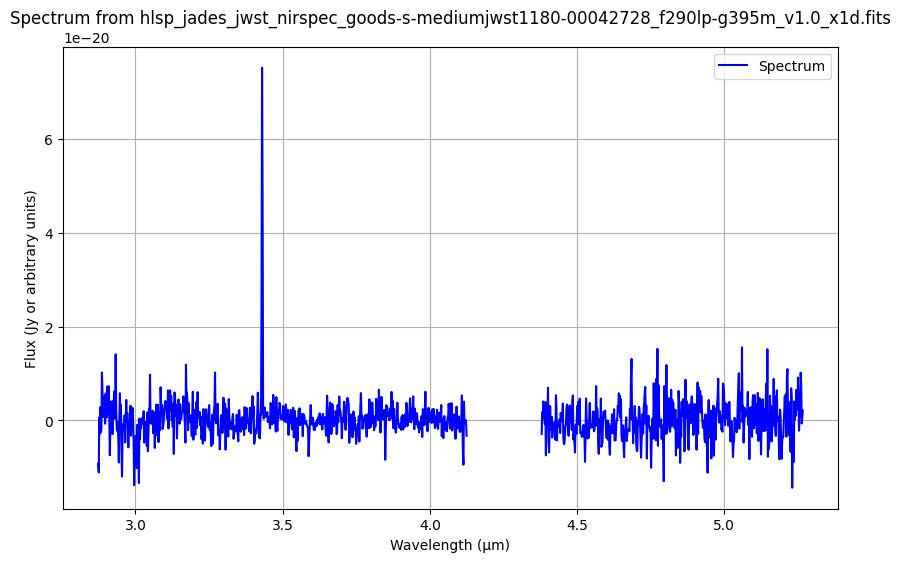

In [18]:
import matplotlib.pyplot as plt

# Check if we have any data
if not df.empty:
    # Select the first spectrum
    first_spectrum = df.iloc[0]

    # Extract wavelength and flux
    wavelengths = first_spectrum['wavelengths']
    fluxes = first_spectrum['fluxes']

    # Plot the spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, fluxes, color='blue', label='Spectrum')
    plt.xlabel('Wavelength (µm)')
    plt.ylabel('Flux (Jy or arbitrary units)')
    plt.title(f"Spectrum from {first_spectrum['filename']}")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("No valid spectra found in the dataset.")